In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [17]:
# X_train.shape(60000,28,28)
# Y_train conatins the label for X_train
# print(y_train[5])

# now converting the pixel value between 0 and 1 by dividing by 255(Max val)
X_train=X_train/255

In [7]:
import matplotlib.pyplot as plt

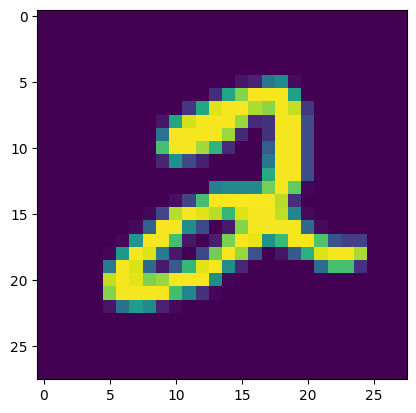

In [15]:
plt.imshow(X_train[5])

In [30]:
# Now creating the model and adding the dense and fFlatten layer
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\jeetu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# model.summary()

In [33]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
# Trained the model
history=model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9785 - val_loss: 0.2744
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9766 - val_loss: 0.2466
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9777 - val_loss: 0.2556
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9763 - val_loss: 0.2580
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9772 - val_loss: 0.2609


In [37]:
pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [51]:
# now an output dimension is 10(Conatins the probability the of every number, argmax() returns the number with max probability)
y_pred=pred.argmax(axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [53]:
# calculating the accuracy score 
import sklearn
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

# for the better accuracy we can increase the epoch size 

0.9792


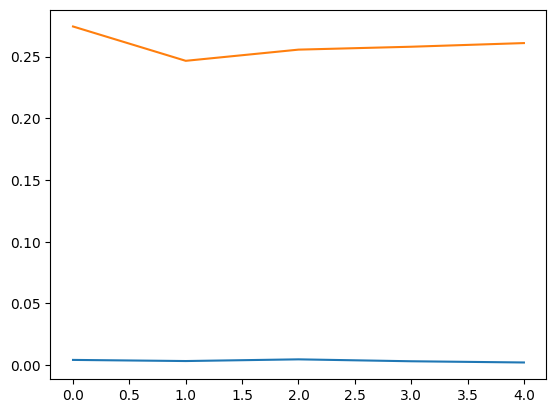

In [59]:
# viaualizing with the graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])